# Homework 2
#### EE-556 Mathematics of Data - Fall 2024

This homework covers Lectures 8-12. Please take a look at the material for the context and notation.

In this homework we will study minimax problems. We will begin with some theoretical analysis and in a second part you will implement a Wasserstein Generative Adversarial Network (WGAN). 

These notebooks should expose you to the fundamentals of GAN training at a basic level, as well as some of the theory behind it.

## 1. Minimax problems - 65 points

### 1.1 Theoretical recap: stationary points and convergence in minmax games - 25 points

Consider a stylized function $f: \mathbb{R}^2 \to \mathbb{R}$, such that we have $f(x, y)=(ax-b)(ay-c)$ for some $a \neq 0,b,c$.

__(1)__ (5 points) Write down the first-order stationary points of $f$, and
        classify them as local minimum, local maximum, or saddle point by
        inspecting its Hessian.




$\nabla_x f(x, y) = a(ay - c) = 0$ & $\nabla_y f(x, y) = a(ax - b) = 0$ $\Rightarrow$ one stationary point in $y = \frac{c}{a}$ and $x = \frac{b}{a}$\
$\nabla f(x, y) = \begin{bmatrix} a(ay - c) \\ a(ax - b) \end{bmatrix}$ which is linear. Thus only one first-order stationary point exists\
$\mathbf{H} = \begin{bmatrix} 0 & a^2 \\ a^2 & 0 \end{bmatrix}$\
$\det(\mathbf{H} - \lambda \mathbf{I}) = \lambda^2 - a^4$\
$\Rightarrow \lambda = \pm a^2$ for some $a \neq 0$ \
$\Rightarrow \mathbf{H}$ is semidefinite\
$\Rightarrow$ the only first-order stationary point $(\frac{b}{a}, \frac{c}{a})$ is a saddle point.

__(2)__ (5 points) Find the solution $(x^\star,y^\star)$ to the
        minimax problem $\min_x \max_y f(x, y)$. You can quantify the solution
        by using the following saddle point inequality:  $f(x^\star, y^\star)
        \geq f(x^\star, y)$ and $f(x^\star, y^\star) \leq f(x, y^\star)$, for
        all $x, y$.
        
**HINT:** $(x^\star, y^\star)$ can only be one of the critical points you found in (1), just evaluate $f$ at every place in the inequalities to check the optimality!




$f(x^\star, y^\star) \geq f(x^\star, y)$ and $f(x^\star, y^\star) \leq f(x, y^\star)$\
$x^\star = \frac{b}{a}$ and $y^\star = \frac{c}{a}$\
$(ax^\star-b)(ay^\star-c) \geq (ax^\star-b)(ay-c)$ and $(ax^\star-b)(ay^\star-c) \leq (ax-b)(ay^\star-c)$\
$0 \geq 0$ and $0 \leq 0$\
$\Rightarrow$ $(\frac{b}{a}, \frac{c}{a})$ is the solution

__(3)__ (15 points) One possible attempt at finding this solution via iterative
        first-order methods is to perform gradient updates on the variables $x$
        and $y$. More precisely for $\gamma > 0$ consider the simultaneous gradient
        descent/ascent updates
        
\begin{equation}
    x_{k+1} = x_k - \gamma \nabla_x f(x_k, y_k), \qquad
    y_{k+1} = y_k + \gamma \nabla_y f(x_k, y_k) \nonumber
\end{equation}
Show that the sequence of iterates $\{x_k, y_k \}_{k=0}^\infty$ starting
from any point $(x_0, y_0) \neq (x^\star, y^\star)$ diverges, for any $\gamma > 0$.
Find the rate at which the distance from 
$(x^\star,y^\star)$ to the sequence $\{x_k, y_k \}$ grows as the number of iterations $k$ increases.

**HINT:** Define $d_k^2=||(x_k,y_k)-(x^\star, y^\star)||_2^2$ as the sequence of squared distances to the optimum. If you find a formula for how $d_{k+1}$ depends on $d_k$ using the exact gradient updates for our $f$, you can easily argue for the divergence and the rate.

 $d_k^2=||(x_k,y_k)-(x^\star, y^\star)||_2^2$ = $||(x_{k-1} - \gamma \nabla_x f(x_{k-1}, y_{k-
1}),y_{k-1} + \gamma \nabla_y f(x_{k-1}, y_{k-1}))-(x^\star, y^\star)||_2^2$ = $||(x_{k-1} - \gamma a(ay_{k-1}  - c),y_{k-1} - \gamma a(ax_{k-1}  - b)) -(x^\star, y^\star )||_2^2$ = \
 $||(x_{k-1} - \gamma a^2(y_{k-1}  - c/a),y_{k-1} - \gamma a^2(x_{k-1}  - b/a)) -(x^\star, y^\star )||_2^2$ = $||(x_{k-1} - \gamma a^2(y_{k-1}  - y^\star),y_{k-1} - \gamma a^2(x_{k-1}  - x^\star)) -(x^\star, y^\star )||_2^2$ = \
 $(x_{k-1} - \gamma a^2(y_{k-1}  - y^\star)-x^\star)^2 + ((y_{k-1} - \gamma a^2(x_{k-1}  - x^\star)) - y^\star)^2$ = \
 $(x_{k-1}-x^\star)^2  + (- \gamma a^2(y_{k-1}  - y^\star))^2 - 2(x_{k-1}-x^\star)(- \gamma a^2(y_{k-1}  - y^\star)) + ((y_{k-1} - y^\star)^2 + (- \gamma a^2(x_{k-1}  - x^\star))^2 -2(y_{k-1} - y^\star)(- \gamma a^2(x_{k-1}  - x^\star))$ = \
 $ (1 + (- \gamma a^2)^2)d_{k-1}^2 + 2\gamma a^2[(x_{k-1}-x^\star)(y_{k-1}  - y^\star) -(y_{k-1} - y^\star)(x_{k-1}  - x^\star)]$  =  $ (1 + \gamma^2 a^4)d_{k-1}^2$

 =>  $d_k^2= (1+\gamma^2a^4)d_{k-1}^2$

=> $d_k = \sqrt{1+\gamma^2a^4} d_{k-1}$ 

=> $d_k = \sqrt{(1+\gamma^2a^4)^k} d_{0}$

__(Optional $\star$)__ A second attempt at finding the solution via _alternating_ gradient descent ascent on $x$
        and $y$. More precisely for $\gamma > 0$ consider the update
        
\begin{equation}
    x_{k+1} = x_k - \gamma \nabla_x f(x_k, y_k), \qquad
    y_{k+1} = y_k + \gamma \nabla_y f(x_{k+1}, y_k) \nonumber
\end{equation}
Show that the sequence of iterates $\{x_k, y_k \}_{k=0}^\infty$ starting
from any point $(x_0, y_0) \neq (x^\star, y^\star)$ i) never converges, ii) but still remains bounded under certain stepsize conditions.

**HINT**: Reduce the problem to studying a linear system.




### 1.2 A concrete example: Rock - Paper - Scissors - Lizard - Spock - 40 points

To make your previous abstract analysis more concrete, we will now look at the iconic Rock-Paper-Scissors-Lizard-Spock game. Sheldon and Leonard always like to settle their differences through a round of this game, whose rules they state as follows:

*"Scissors cuts Paper, Paper covers Rock, Rock crushes Lizard, Lizard poisons Spock, Spock smashes Scissors, Scissors decapitates Lizard, Lizard eats Paper, Paper disproves Spock, Spock vaporizes Rock, (and as it always has) Rock crushes Scissors"*

Sheldon and Leonard always pick to play Spock because "logic trumps all", it will be your task to show that this is not the optimal strategy.

We can formalize the game as follows. There are two players, the `x` player (e.g. Sheldon) and the `y` player (e.g. Leonard). There is only one single round. The players play a randomized strategy: each player chooses a probability of playing rock/paper/scissors/lizard/Spock. We look at the expected pay-off of these randomized strategies. 

In other words, the players choose an element in $\Delta_5$ the probability simplex in dimension 5. The `x` player chooses a vector $\mathbf{x} = \begin{bmatrix} \mathbf{x}_1 & \mathbf{x}_2 & \mathbf{x}_3 & \mathbf{x}_4 & \mathbf{x}_5 \end{bmatrix} \in \Delta_5$ where $\mathbf{x}_1$ is the probability of playing `Rock`, $\mathbf{x}_2$ is the probability of playing `Paper`, $\mathbf{x}_3$ is the probability of playing `Scissors`, $\mathbf{x}_4$ is the probability of playing `Lizard`, $\mathbf{x}_5$ is the probability of playing `Spock`. The `y` player chooses a vector $\mathbf{y} \in \Delta_5$ defined in the same way. 

The game designers decide that winning the game gives 1 point and a tie gives 0 points. So the expected payoff for a give choice of strategies $\mathbf{x}, \mathbf{y}$ is obtained by computing:
$$
\mathbf{x}^\top \begin{bmatrix} 0 & 1 & -1 & -1 & 1 \\ -1 & 0 & 1 & 1 & -1 \\ 1 & -1 & 0 & -1 & 1 \\ 1 & -1 & 1 & 0 & -1 \\ -1 & 1 & -1 & 1 & 0 \end{bmatrix}\mathbf{y}
$$

The `x` player wants to minimize this expected payoff and the `y` player wants to maximize it. So the problem we seek to solve is

$$
\min_{\mathbf{x} \in \Delta_5} \max_{\mathbf{y} \in \Delta_5} \mathbf{x}^\top \mathbf{M}\mathbf{y} =: f(\mathbf{x}, \mathbf{y})
$$
with $\mathbf{M} = \begin{bmatrix} 0 & 1 & -1 & -1 & 1 \\ -1 & 0 & 1 & 1 & -1 \\ 1 & -1 & 0 & -1 & 1 \\ 1 & -1 & 1 & 0 & -1 \\ -1 & 1 & -1 & 1 & 0 \end{bmatrix}$.

In the following cells, you will implement methods to solve this game and find the optimal strategies.

In [15]:
import torch
from ipywidgets import interact, SelectionSlider, fixed
from itertools import combinations
from scipy.stats import entropy
from lib.utils import *

**(1)** (2 points) Implement the objective function $f$ given two 3 dimensional vectors `x` and `y` stored as `torch.Tensor` objects.

In [16]:
M = torch.tensor([[0.0, 1.0, -1.0, -1.0, 1.0], 
                  [-1.0, 0.0, 1.0, 1.0, -1.0], 
                  [1.0, -1.0, 0.0, -1.0, 1.0],
                  [1.0, -1.0, 1.0, 0.0, -1.0], 
                  [-1.0, 1.0, -1.0, 1.0, 0.0]])
def f(x: torch.Tensor, y: torch.Tensor):
    return torch.dot(x,torch.matmul(M,y))

**(2)** (10 points) Implement a single step of the simultaneous gradient descent/ascent studied in question 1.1.(3). Since we are in a constrained setting, make sure you include a projection step onto the simplex. 

The function `GDA` you will implement takes in the objective function `f`, the two current strategies of the players stored in tensors `x` and `y` and a step_size. Write the function so that it modifies the variables `x` and `y` in place without returning anything.

We provide you with a function called `simplex_project` that projects a vector on the probability simplex. The function has no return value and does the projection in place. Use `Pytorch` to compute gradients automatically. 

__Hints__: Review what a call to `.backward()` on a tensor does. Review what in-place operations are like `.add_`. Think of which steps need to be in a `with torch.no_grad()` block. Remember to zero the gradients before re-using them.

In [17]:
def GDA(f, x, y, step_size):
    payoff = f(x, y)
    payoff.backward()
    
    with torch.no_grad():
        x.add_(-step_size*x.grad) #new x_k+1
        y.add_(step_size*y.grad) #new y_k+1
        simplex_project(x)
        simplex_project(y)

    x.grad.zero_()
    y.grad.zero_()

We can run this algorithm initialized from Sheldon and Leonard's strategies of always playing Spock.

In [18]:
x_init = torch.tensor([0.0, 0.0, 0.0, 0.0, 1.0])
y_init = torch.tensor([0.0, 0.0, 0.0, 0.0, 1.0])

gda_x_sequence, gda_y_sequence = run_alg(GDA, f, x_init, y_init, step_size=0.05, n_iterations=2500)

We can visualize this sequence as ${4 \choose 2} = 6$ two dimensional slices since the simplex $\Delta_5$ is 4-dimensional.

In [19]:
dim_pairs = list(combinations(range(4), 2))
def visualize_seq_slice(dim_pair):
    visualize_seq(gda_x_sequence[:, dim_pairs[dim_pair]], 
                  gda_y_sequence[:, dim_pairs[dim_pair]],
                  dim_pairs[dim_pair])
interact(visualize_seq_slice, dim_pair=SelectionSlider(
    options=range(len(dim_pairs)),
    value=0,
    description="Dim pair:",
    disabled=False,
    continuous_update=False,
    orientation="horizontal",
    readout=True
))

interactive(children=(SelectionSlider(continuous_update=False, description='Dim pair:', options=(0, 1, 2, 3, 4…

<function __main__.visualize_seq_slice(dim_pair)>

To have plots that aggregate the convergence status over all 5 dimensions at the same time, let's also visualize:

- the duality gap over time: $g_k = \max_{\mathbf{y} \in \Delta_5}{f(\mathbf{x}_k,\mathbf{y})} - \min_{\mathbf{x} \in \Delta_5}{f(\mathbf{x},\mathbf{y}_k)} = \max_{i}{(\mathbf{M}^\top \mathbf{x}_k)_i} - \min_{i}{(\mathbf{M} \mathbf{y}_k)_i}$
- the distance to the optimum over time: $d_k=\sqrt{||\mathbf{x}_k-\mathbf{x}^\star||_2^2 + ||\mathbf{y}_k-\mathbf{y}^\star||_2^2}$
- the discrete entropy over time of the x and y strategies (we can do this since they are probability distributions): $H(\mathbf{x}_k)=-\sum_{i=1}^{5}{\mathbf{x}_k^{(i)}\log{\mathbf{x}_k^{(i)}}}, H(\mathbf{y}_k)=-\sum_{i=1}^{5}{\mathbf{y}_k^{(i)}\log{\mathbf{y}_k^{(i)}}}$

In [20]:
def distance_to_opt(L_x, L_y):
    return np.sqrt(np.sum((L_x - 0.2) ** 2 + (L_y - 0.2) ** 2, axis=1))

In [21]:
def duality_gap(L_x, L_y):
    return (np.max(M.numpy().T.reshape(1, 5, 5) @ L_x.reshape(-1, 5, 1), axis=(1, 2)) 
            - np.min(M.numpy().reshape(1, 5, 5) @ L_y.reshape(-1, 5, 1), axis=(1, 2)))

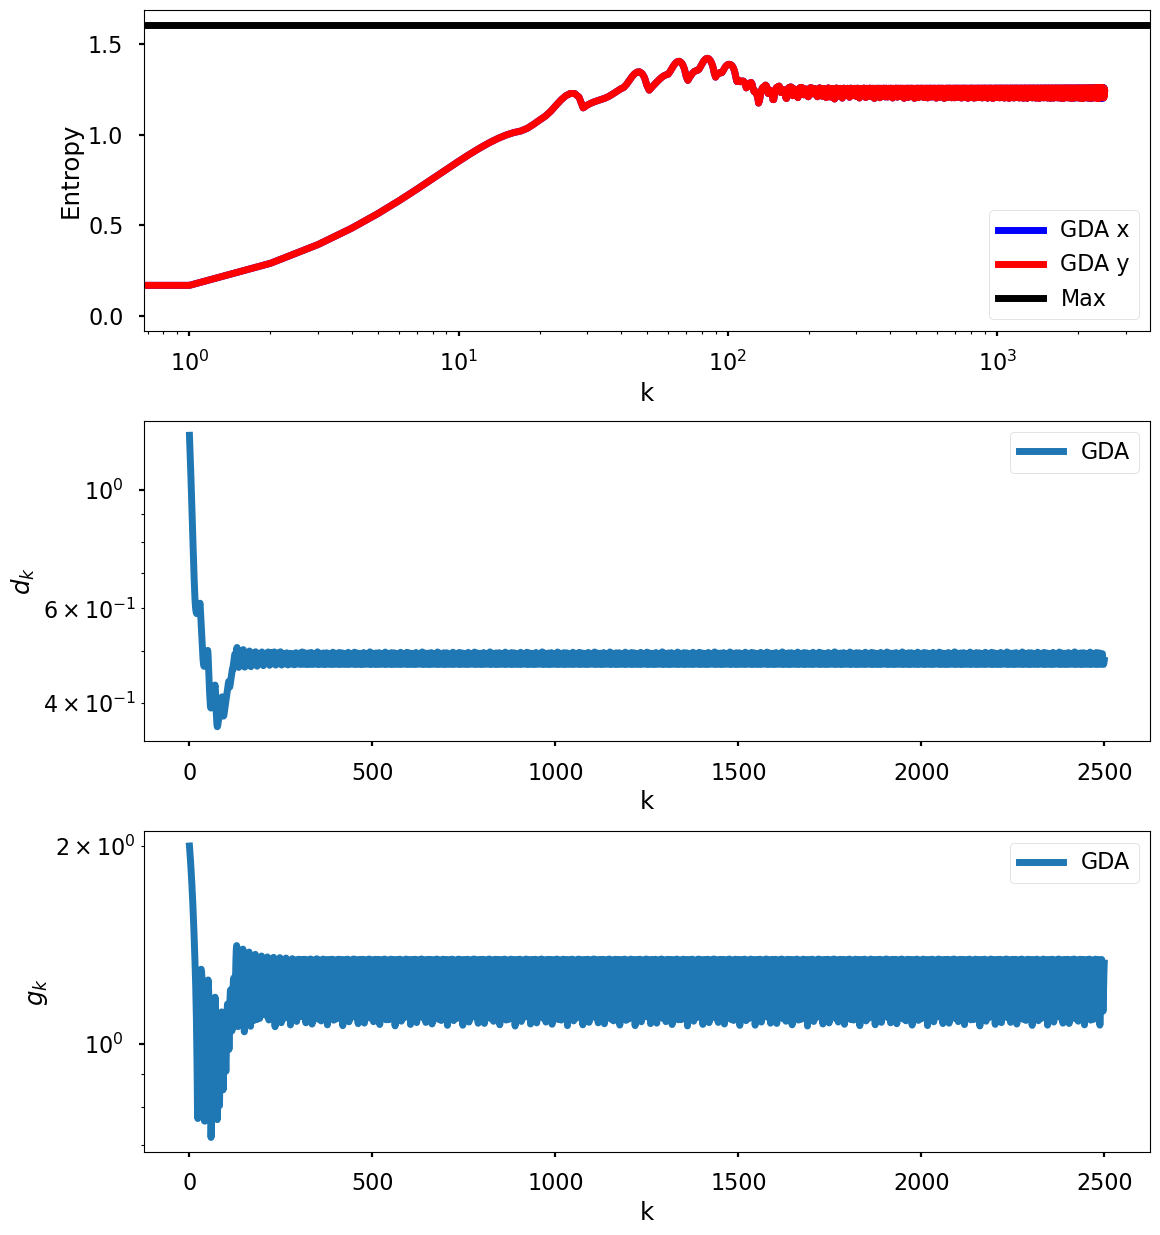

In [22]:
plt.style.use('seaborn-v0_8-poster')
fig, ax = plt.subplots(3, 1, figsize=(11.7, 1.5 * 8.3))
ax[0].plot(range(len(gda_x_sequence)), entropy(gda_x_sequence, axis=1), lw=5, color='b', label="GDA x")
ax[0].plot(range(len(gda_y_sequence)), entropy(gda_y_sequence, axis=1), lw=5, color='r', label="GDA y")
ax[0].axline((0, np.log(5)), slope=0, color='black', lw=5, label="Max")
ax[0].legend()
ax[0].set_xscale("log")
ax[0].set_xlabel("k")
ax[0].set_ylabel("Entropy")
ax[1].plot(range(len(gda_x_sequence)), distance_to_opt(gda_x_sequence, gda_y_sequence), lw=5, label="GDA")
ax[1].legend()
ax[1].set_yscale("log")
ax[1].set_xlabel("k")
ax[1].set_ylabel("$d_k$")
ax[2].plot(range(len(gda_x_sequence)), duality_gap(gda_x_sequence, gda_y_sequence), lw=5, label="GDA")
ax[2].legend()
ax[2].set_yscale("log")
ax[2].set_xlabel("k")
ax[2].set_ylabel("$g_k$")
fig.tight_layout()
plt.show()

**(3)** (3 point) What kind of behavior do you observe ? Do the iterates converge ? Play with the step_size and the number of iterations.




No they do not converge they always oscillate after some time. 

**(4)** (10 points) As you've shown both theoretically and in practice, simultaneous Gradient Descent Ascent (sGDA) cannot solve the problem. You will now implement `ExtraGradient` (EG), an algorithm that can solve bilinear games. We will denote the projection onto the decision space of the x-player and y-player, $\Pi_{\mathcal X}$ and $\Pi_{\mathcal Y}$, respectively.

As discussed in class, the idea behind extra-gradient is to approximate an implicit update with a more tractable one. 

Let $\mathbf{z}_k = \begin{bmatrix} x_k \\ y_k \end{bmatrix}$, $\Pi(\mathbf{z})=\begin{bmatrix} \Pi_{\mathcal X}(x) \\ \Pi_{\mathcal Y}(y) \end{bmatrix}$ and $G(\mathbf{z}_k) = \begin{bmatrix} \nabla_x f(x_k,y_k) \\ -\nabla_y f(x_k,y_k) \end{bmatrix}$.

Consider the following implicit updates:
\begin{equation}
    \mathbf{z}_{k+1} = \Pi(\mathbf{z}_k - \gamma G(\color{red}{\mathbf{z}_{k+1}})) \nonumber
\end{equation}

Computing the next iterate $\mathbf{z}_{k+1}$ requires you to solve a fixed point problem because we are evaluating the gradient at the unknown next iterate.  As this is too costly, we circumvent this difficulty by doing an _extrapolation_ step. Define the half steps:

\begin{equation}
    \mathbf{z}_{k+1/2} = \Pi(\mathbf{z}_k - \gamma G(\mathbf{z}_k)) \nonumber
\end{equation}

These half step extrapolation variables will help us to approximate the implicit iterates. We can then write
\begin{equation}
    \mathbf{z}_{k+1} = \Pi(\mathbf{z}_k - \gamma G(\color{green}{\mathbf{z}_{k+1/2}})) \nonumber
\end{equation}
The recursion above defines the EG algorithm.


In [23]:
def ExtraGradient(f, x, y, step_size):
    payoff = f(x, y)
    payoff.backward()

    extra_x = (x - step_size*x.grad)
    extra_y = (y + step_size*y.grad)

    simplex_project(extra_x)
    simplex_project(extra_y)

    extra_payoff = f(extra_x, extra_y)
    
    extra_x.retain_grad()
    extra_y.retain_grad()
    extra_payoff.backward()
    with torch.no_grad():
        x.add_(-step_size*extra_x.grad)
        y.add_(step_size*extra_y.grad)
        simplex_project(x)
        simplex_project(y)

    x.grad.zero_()
    y.grad.zero_()

In [24]:
eg_x_sequence, eg_y_sequence = run_alg(ExtraGradient, f, x_init, y_init, step_size=0.1, n_iterations=2500)

In [25]:
dim_pairs = list(combinations(range(4), 2))
def visualize_seq_slice(dim_pair):
    visualize_seq(eg_x_sequence[:, dim_pairs[dim_pair]], 
                  eg_y_sequence[:, dim_pairs[dim_pair]],
                  dim_pairs[dim_pair])
interact(visualize_seq_slice, dim_pair=SelectionSlider(
    options=range(len(dim_pairs)),
    value=0,
    description="Dim pair:",
    disabled=False,
    continuous_update=False,
    orientation="horizontal",
    readout=True
))

interactive(children=(SelectionSlider(continuous_update=False, description='Dim pair:', options=(0, 1, 2, 3, 4…

<function __main__.visualize_seq_slice(dim_pair)>

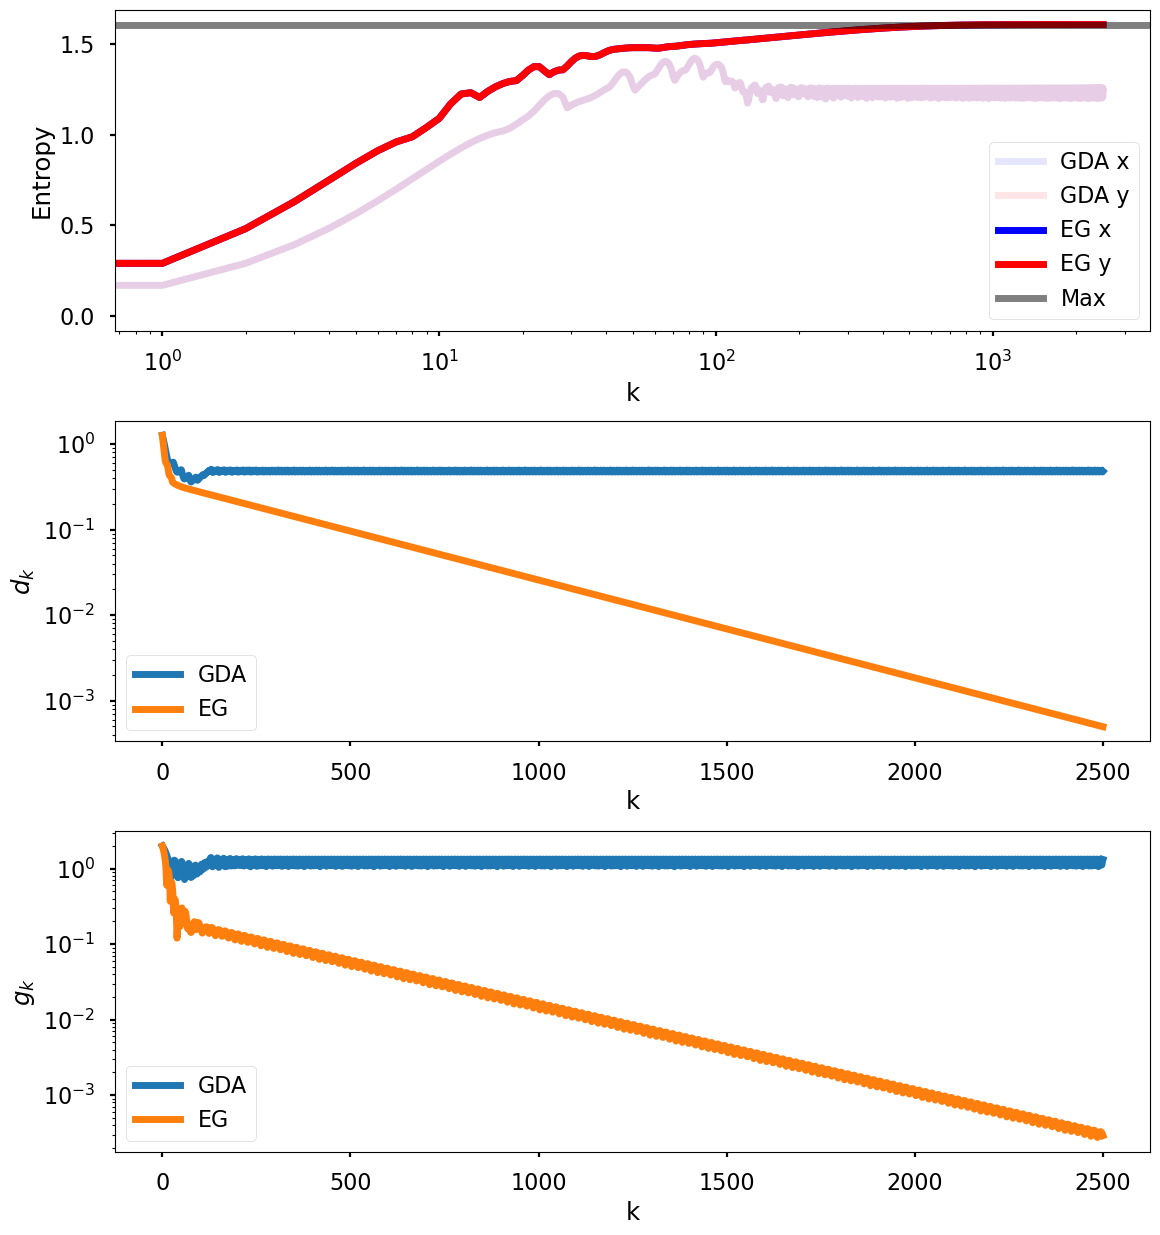

In [26]:
plt.style.use('seaborn-v0_8-poster')
fig, ax = plt.subplots(3, 1, figsize=(11.7, 1.5 * 8.3))
ax[0].plot(range(len(gda_x_sequence)), entropy(gda_x_sequence, axis=1), lw=5, color='b', alpha=0.1, label="GDA x")
ax[0].plot(range(len(gda_y_sequence)), entropy(gda_y_sequence, axis=1), lw=5, color='r', alpha=0.1, label="GDA y")
ax[0].plot(range(len(eg_x_sequence)), entropy(eg_x_sequence, axis=1), lw=5, color='b', label="EG x")
ax[0].plot(range(len(eg_y_sequence)), entropy(eg_y_sequence, axis=1), lw=5, color='r', label="EG y")
ax[0].axline((0, np.log(5)), slope=0, color='black', lw=5, alpha=0.5, label="Max")
ax[0].legend()
ax[0].set_xscale("log")
ax[0].set_xlabel("k")
ax[0].set_ylabel("Entropy")
ax[1].plot(range(len(gda_x_sequence)), distance_to_opt(gda_x_sequence, gda_y_sequence), lw=5, label="GDA")
ax[1].plot(range(len(eg_x_sequence)), distance_to_opt(eg_x_sequence, eg_y_sequence), lw=5, label="EG")
ax[1].legend()
ax[1].set_yscale("log")
ax[1].set_xlabel("k")
ax[1].set_ylabel("$d_k$")
ax[2].plot(range(len(gda_x_sequence)), duality_gap(gda_x_sequence, gda_y_sequence), lw=5, label="GDA")
ax[2].plot(range(len(eg_x_sequence)), duality_gap(eg_x_sequence, eg_y_sequence), lw=5, label="EG")
ax[2].legend()
ax[2].set_yscale("log")
ax[2].set_xlabel("k")
ax[2].set_ylabel("$g_k$")
fig.tight_layout()
plt.show()

**(BONUS)** What can you observe about the optimal solution? What properties does the optimal Rock-Paper-Scissors-Lizard-Spock strategy have? Prove that extra-gradient in the bilinear case doesn't diverge like GDA. (Again, candy reward for correct answers!)




The optimal solution reaches a higher entropy than the previous solution. Though, as it reaches the maximum, which implies that the optimal solution it found is to maximise the payoff for y. We can see that the distance ot the optimal solution $d_k$ decreases. It means that over the k steps, we are getting very close to the solution.  

**(5)** (10 points) It turns out that we can _generalize_ the ExtraGradient method naturally by striving for a bit more accurate extrapolation. Namely, instead of always performing 1 extrapolation step updating half-iterates before the main parameter update, we can perform $m\geq 1$ fractional steps. Implement this ClairvoyantExtraGradient (CEG) method [1], with the precise update step formulas given below:

\begin{equation}
    \mathbf{z}_{k+1(\color{green}{1/m+1})} = \Pi(\mathbf{z}_k - \gamma G(\color{green}{\mathbf{z}_{k}})) \\
    \mathbf{z}_{k+1(\color{green}{2/m+1})} = \Pi(\mathbf{z}_{k+1(\color{green}{1/m+1})} - \gamma G(\mathbf{z}_{k+1(\color{green}{1/m+1})})) \\
    \vdots \\
    \mathbf{z}_{k+1(\color{green}{m/m+1})} = \Pi(\mathbf{z}_{k+1(\color{green}{m-1/m+1})} - \gamma G(\mathbf{z}_{k+1(\color{green}{m-1/m+1})})) \\
    \mathbf{z}_{k+1} = \Pi(\mathbf{z}_k - \gamma G({\mathbf{z}_{k+1(\color{green}{m/m+1})} })) \nonumber
\end{equation}


[1] Cevher, Volkan, Georgios Piliouras, Ryann Sim, and Stratis Skoulakis. “Min-Max Optimization Made Simple: Approximating the Proximal Point Method via Contraction Maps.” In 2023 Symposium on Simplicity in Algorithms (SOSA), 192–206. Proceedings. Society for Industrial and Applied Mathematics, 2023. https://doi.org/10.1137/1.9781611977585.ch18.

In [ ]:
def ClairvoyantExtraGradient(f, x, y, step_size, m=1):

    payoff = f(x, y)
    payoff.backward()

    extra_x = (x - step_size*x.grad)
    extra_y = (y + step_size*y.grad)

    simplex_project(extra_x)
    simplex_project(extra_y)

    extra_payoff = f(extra_x, extra_y)
    
    extra_x.retain_grad()
    extra_y.retain_grad()
    extra_payoff.backward()

        
    for _ in range(m-1):
        extra_x = (extra_x - step_size*extra_x.grad)
        extra_y = (extra_y + step_size*extra_y.grad)
        simplex_project(extra_x)
        simplex_project(extra_y)
        extra_payoff = f(extra_x, extra_y)
    
        extra_x.retain_grad()
        extra_y.retain_grad()
        extra_payoff.backward(retain_graph=True)
    
    with torch.no_grad():
        x.add_(-step_size*extra_x.grad)
        y.add_(step_size*extra_y.grad)
        simplex_project(x)
        simplex_project(y)

    # Clear gradients
    x.grad.zero_()
    y.grad.zero_()

    return x, y

In [28]:
m_values = [1, 2, 3, 5, 10, 25] # You can change this if you wish
ceg_x_sequences, ceg_y_sequences = [], []
for m in m_values:
    print("m =", m)
    step_size = 0.1 if m != 10 else 0.09 # You can change this if you wish
    ceg_x_sequence, ceg_y_sequence = run_alg(ClairvoyantExtraGradient, f, x_init, y_init, 
                                             n_iterations=2500, step_size=step_size, m=m)
    ceg_x_sequences.append(ceg_x_sequence)
    ceg_y_sequences.append(ceg_y_sequence)

m = 1


UnboundLocalError: local variable 'z_x' referenced before assignment

In [ ]:
dim_pairs = list(combinations(range(4), 2))
def visualize_seq_slice(L_x, L_y, dim_pair):
    visualize_seq(L_x[:, dim_pairs[dim_pair]], 
                  L_y[:, dim_pairs[dim_pair]],
                  dim_pairs[dim_pair])
for m, ceg_x_sequence, ceg_y_sequence in zip(m_values, ceg_x_sequences, ceg_y_sequences):
    print("m =", m)
    interact(visualize_seq_slice, L_x=fixed(ceg_x_sequence), L_y=fixed(ceg_y_sequence), dim_pair=SelectionSlider(
        options=range(len(dim_pairs)),
        value=0,
        description="Dim pair:",
        disabled=False,
        continuous_update=False,
        orientation="horizontal",
        readout=True
    ))

In [ ]:
plt.style.use('seaborn-v0_8-poster')
fig, ax = plt.subplots(3, 1, figsize=(11.7, 1.5 * 8.3))
ax[0].plot(range(len(gda_x_sequence)), entropy(gda_x_sequence, axis=1), lw=5, alpha=0.1, label="GDA x")
ax[1].plot(range(len(gda_x_sequence)), distance_to_opt(gda_x_sequence, gda_y_sequence), lw=5, label="GDA")
ax[2].plot(range(len(gda_x_sequence)), duality_gap(gda_x_sequence, gda_y_sequence), lw=5, label="GDA")
for m, ceg_x_sequence, ceg_y_sequence in zip(m_values, ceg_x_sequences, ceg_y_sequences):
    ax[0].plot(range(len(ceg_x_sequence)), entropy(ceg_x_sequence, axis=1), lw=5, label=f"CEG-{m} x")
    ax[1].plot(range(len(ceg_x_sequence)), distance_to_opt(ceg_x_sequence, ceg_y_sequence), lw=5, label=f"CEG-{m}")
    ax[2].plot(range(len(ceg_x_sequence)), duality_gap(ceg_x_sequence, ceg_y_sequence), lw=5, label=f"CEG-{m}")
ax[0].axline((0, np.log(5)), slope=0, color='black', lw=5, alpha=0.5, label="Max")
ax[0].legend()
ax[0].set_xscale("log")
ax[0].set_xlabel("k")
ax[0].set_ylabel("Entropy")
ax[1].legend()
ax[1].set_yscale("log")
ax[1].set_xlabel("k")
ax[1].set_ylabel("$d_k$")
ax[2].legend()
ax[2].set_yscale("log")
ax[2].set_xlabel("k")
ax[2].set_ylabel("$g_k$")
fig.tight_layout()
plt.show()
fig.tight_layout()
plt.show()

**(6)** (5 points) Discuss what you observe for the CEG runs. How do the value of $m$ and the step size influence the convergence and the computation cost? Is there a sweet spot?


